In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import xlrd
# Load datasets
import pandas as pd

# Load datasets
d = pd.read_csv('accidentRate.csv')
df = pd.read_csv('roadAccStats13-16.csv')
df1 = pd.read_csv('Details_of_road_accident_deaths_by_situation_state_2014.csv')
df2 = pd.read_csv('Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')
df3 = pd.read_csv('accidents03-16.csv')
df4 = pd.read_csv('laneAccidents.csv')
df5 = pd.read_csv('reasonOfAccident.csv')
df6 = pd.read_csv('typeOfVehicle.csv')
df7 = pd.read_csv('timeOfOccurence.csv')







In [124]:
print(df.dtypes)


SI. No.                                                          object
States/UTs                                                       object
State/UT-Wise Total Number of Road Accidents during - 2013      float64
State/UT-Wise Total Number of Road Accidents during - 2014        int64
State/UT-Wise Total Number of Road Accidents during - 2015        int64
State/UT-Wise Total Number of Road Accidents during - 2016        int64
Share of States/UTs in Total Number of Road Accidents - 2013    float64
Share of States/UTs in Total Number of Road Accidents - 2014    float64
Share of States/UTs in Total Number of Road Accidents - 2015    float64
Share of States/UTs in Total Number of Road Accidents - 2016    float64
Total Number of Accidents Per Lakh Population - 2013            float64
Total Number of Accidents Per Lakh Population - 2014            float64
Total Number of Accidents Per Lakh Population - 2015            float64
Total Number of Accidents Per Lakh Population - 2016            

Total Accidents: 1957951.0
Year Accidents:
 Year
0            0.0
2013    486476.0
2014    489400.0
2015    501423.0
2016    480652.0
Name: Accidents, dtype: float64
Percentage Accidents:
 Year
0        0.000000
2013    24.846178
2014    24.995518
2015    25.609579
2016    24.548725
Name: Accidents, dtype: float64


<Axes: xlabel='Year'>

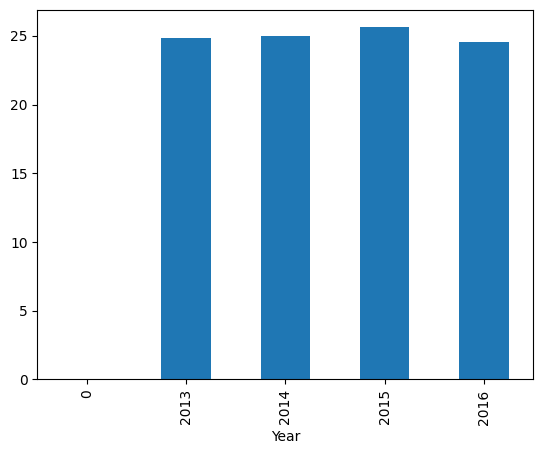

In [125]:
# The percentage of road accidents during all the years.
import pandas as pd
df = pd.read_csv('roadAccStats13-16.csv')
df['Year'] = df['Year'].fillna(0)
df['Year'] = df['Year'].astype(int)
total_accidents = df['Accidents'].sum()
year_accidents = df.groupby('Year')['Accidents'].sum()
print("Total Accidents:", total_accidents) 
print("Year Accidents:\n", year_accidents)  
percentage_accidents = (year_accidents / total_accidents) * 100
print("Percentage Accidents:\n", percentage_accidents)
percentage_accidents.plot(kind='bar')


<Axes: >

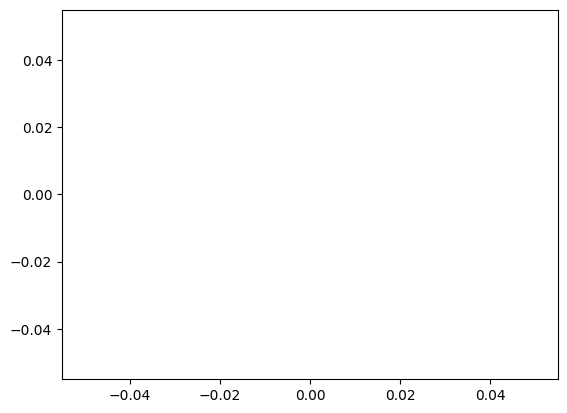

In [177]:
# Mean Accidents per 1L population for each year
mean_accidents_per_lakh = df.groupby('Year')['Accidents'].mean() / (df['Population'] / 100000)
mean_accidents_per_lakh.plot(kind='line')


In [178]:
# The highest number of accident states and least number of accident states.
highest_accident_states = df.groupby('States/UTs')['Accidents'].sum().nlargest(5)
print('highest_accident_states',highest_accident_states)


highest_accident_states States/UTs
Assam                        501423.0
Arunachal Pradesh            489400.0
Andhra Pradesh               486476.0
Bihar                        480652.0
Andaman & Nicobar Islands         0.0
Name: Accidents, dtype: float64


<Axes: xlabel='Gender'>

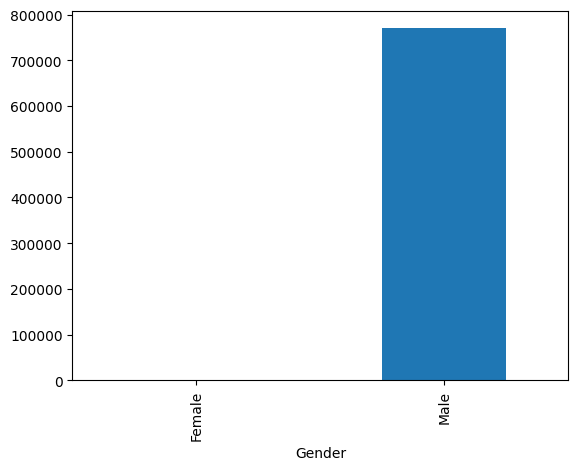

In [179]:
# Offenders and victims who died according to gender as well the as the total deaths.
gender_stats_deaths = df1.groupby('Gender')['Deaths'].sum()
gender_stats_deaths.plot(kind='bar')


In [181]:
#  Percentage of Deaths occurring due to non-wearing of helmets between male and female
non_wearing_helmet_deaths = df2.groupby('Gender')['Deaths'].sum()
non_wearing_helmet_deaths_percentage = (helmet_deaths / helmet_deaths.sum()) * 100
print('helmet_deaths_percentage',non_wearing_helmet_deaths_percentage)


helmet_deaths_percentage Gender
Male    100.0
Name: Deaths, dtype: float64


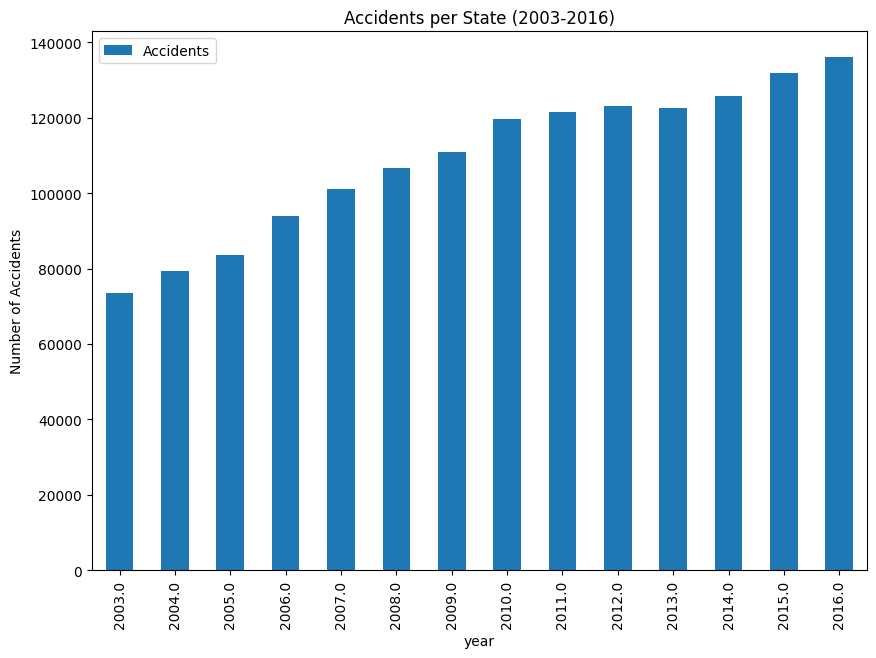

In [182]:
 # The number of accidents happening per state from the year 2003 to 2016.
accidents_per_state = df3.pivot_table(index='year',values='Accidents', aggfunc='sum')
accidents_per_state.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Accidents per State (2003-2016)')
plt.ylabel('Number of Accidents')
plt.show()


<Axes: >

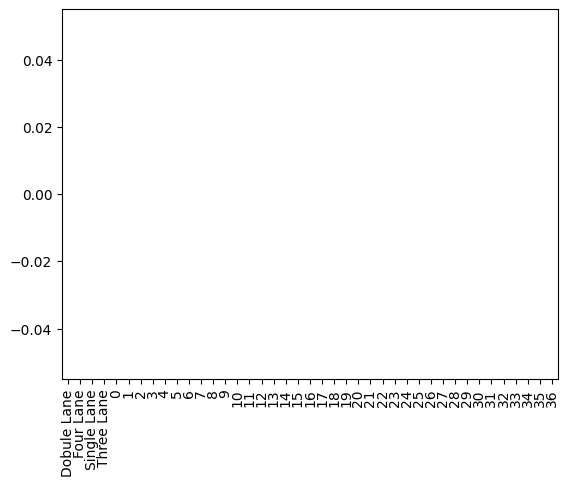

In [183]:
# Number of ACCIDENTS for 1,2,3,4 LANE per 1L population of resp. state
lane_stats_lakhs = df4.groupby('Lane_Types')['Accidents'].sum() / (df4['Population'] / 100000)
lane_stats_lakhs.plot(kind='bar')


<Axes: >

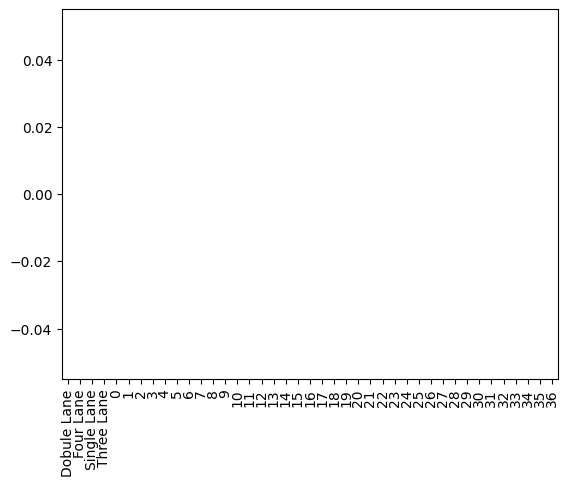

In [185]:
#  Number of people INJURED for 1,2,3,4 type of lane per 1L population of resp. State.
lane_stats_lakhs_injured = df4.groupby('Lane_Types')['Injured'].sum() / (df4['Population'] / 100000)
lane_stats_lakhs_injured.plot(kind='bar')

<Axes: >

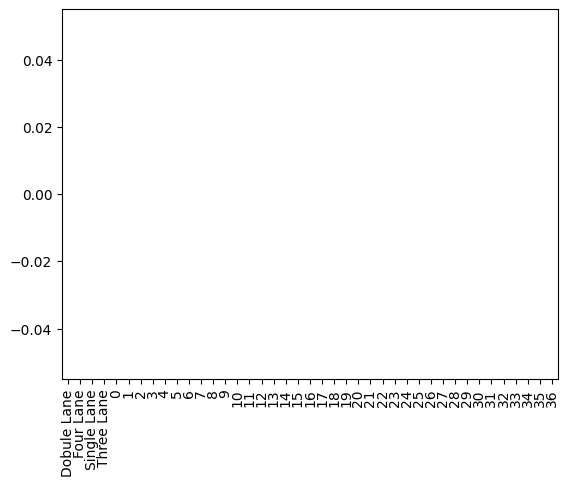

In [186]:
#  Numberof people KILLED for 1,2,3,4 LANES per 1L population of resp. States
lane_stats_lakhs_killed = df4.groupby('Lane_Types')['Killed'].sum() / (df4['Population'] / 100)
lane_stats_lakhs_killed.plot(kind='bar')

<Axes: xlabel='Lane_Types'>

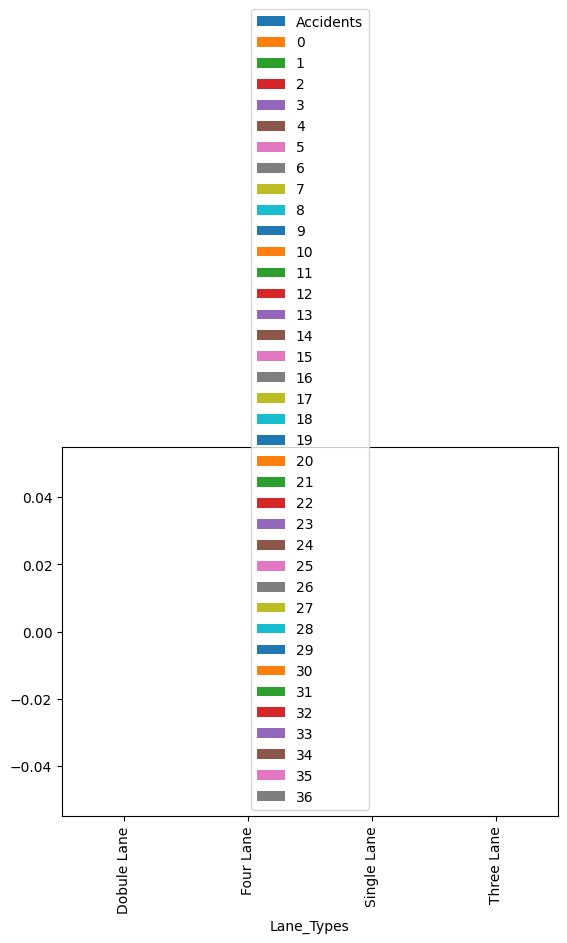

In [100]:
#14 question
import pandas as pd
df4 = pd.read_csv('laneAccidents.csv')
lane_stats = df4.groupby('Lane_Types')[['Accidents']].sum() / (df4['Population'] / 1000)
lane_stats.plot(kind='bar')


In [188]:
# Number of accidents, injured, and killed on single lane per 1L population
single_lane_lakhs = df4[df4['Lane_Types'] == 'Single Lane']
single_lane_lakhs_accidents = single_lane_lakhs['Accidents'].sum() / single_lane['Population'].sum() * 100000
single_lane_lakhs_injured = single_lane_lakhs['Injured'].sum() / single_lane['Population'].sum() * 100000
single_lane_lakhs_killed = single_lane_lakhs['Killed'].sum() / single_lane['Population'].sum() * 100000
print(f"Single Lane - Accidents per 1L: {single_lane_lakhs_accidents}")
print(f"Single Lane - Injured per 1L: {single_lane_lakhs_injured}")
print(f"Single Lane - Killed per 1L: {single_lane_lakhs_killed}")



Single Lane - Accidents per 1L: 0.032732340904052463
Single Lane - Injured per 1L: 0.03424994916586901
Single Lane - Killed per 1L: 0.00950746670338185


In [189]:
# Number of accidents, people INJURED, KILLED on DOUBLE LANE per 1L population.
double_lane_lakhs = df4[df4['Lane_Types'] == 'Double Lane']
double_lane_accidents_lakhs = single_lane_lakhs['Accidents'].sum()
double_lane_injured_lakhs = single_lane_lakhs['Injured'].sum() 
double_lane_killed_lakhs = single_lane_lakhs['Killed'].sum() 
print(f"Double Lane - Accidents per 1L: {double_lane_accidents_lakhs}")
print(f"Double Lane - Injured per 1L: {double_lane_injured_lakhs}")
print(f"Double Lane - Killed per 1L: {double_lane_killed_lakhs}")

Double Lane - Accidents per 1L: 17.15523361
Double Lane - Injured per 1L: 17.95062201
Double Lane - Killed per 1L: 4.982925383


In [190]:
#. Number of accidents, people INJURED, KILLED on THREE LANE per 1L population
three_lane_lakhs = df4[df4['Lane_Types'] == 'Three Lane']
three_lane_lakhs_accidents= three_lane_lakhs['Accidents'].sum() / three_lane['Population'].sum() * 100000
three_lane_lakhs_injured = three_lane_lakhs['Injured'].sum() / three_lane['Population'].sum() * 100000
three_lane_lakhs_killed = three_lane_lakhs['Killed'].sum() / three_lane['Population'].sum() * 100000
print(f"Three Lane - Accidents per 1L: {three_lane_lakhs_accidents}")
print(f"Three Lane - Injured per 1L: {three_lane_lakhs_injured}")
print(f"Three Lane - Killed per 1L: {three_lane_lakhs_killed}")

Three Lane - Accidents per 1L: 0.005919742548575293
Three Lane - Injured per 1L: 46.10393988561531
Three Lane - Killed per 1L: 0.0014357380616848733


In [162]:
# Number of accidents, people INJURED, KILLED on FOUR LANE per 1L population.
four_lane_lakhs = df4[df4['Lane_Types'] == 'Four Lane']
four_lane_lakhs_accidents = four_lane_lakhs['Accidents'].sum() / four_lane['Population'].sum() * 100000
four_lane_lakhs_injured = four_lane_lakhs['Injured'].sum() / four_lane['Population'].sum() * 100000
four_lane_lakhs_killed = four_lane_lakhs['Killed'].sum() / four_lane['Population'].sum() * 100000
print(f"Four Lane - Accidents per 1L: {four_lane_lakhs_accidents}")
print(f"Four Lane - Injured per 1L: {four_lane_lakhs_injured}")
print(f"Four Lane - Killed per 1L: {four_lane_lakhs_killed}")

Four Lane - Accidents per 1L: 0.0045601190936144405
Four Lane - Injured per 1L: 0.004377254192462032
Four Lane - Killed per 1L: 0.0015236890622632672


In [191]:
# Total Number of INJURED, KILLED, ROAD ACCIDENTS irrespective of lanes per 1L population of resp. State.
total_lakhs_accidents = df4['Accidents'].sum() / df4['Population'] * 100000
total_lakhs_injured = df4['Injured'].sum() / df4['Population'] * 100000
total_lakhs_killed = df4['Killed'].sum() / df4['Population'] * 100000
print(f"Total Accidents lakhs: {total_lakhs_accidents}")
print(f"Total Injuries lakhs: {total_lakhs_injured}")
print(f"Total Deaths lakhs: {total_lakhs_killed}")

Total Accidents lakhs: 0      0.075756
1      2.869371
2      0.127235
3      0.038141
4      0.155427
5      2.722183
6      0.065692
7      0.156615
8      0.578391
9      0.316588
10     0.120359
11     0.064987
12     0.118853
13     0.054669
14     0.035332
15     1.390305
16     1.338246
17     3.618670
18     2.006784
19     0.094592
20     0.143113
21     0.057921
22     6.502744
23     0.055032
24     0.123095
25     1.080706
26     0.393646
27     0.019871
28     0.043499
29    10.432538
30     3.761832
31    11.551708
32    16.322610
33     0.236505
34    61.582770
35     3.181551
36     0.003279
Name: Population, dtype: float64
Total Injuries lakhs: 0        27.524713
1      1042.538156
2        46.228539
3        13.857789
4        56.471991
5       989.059779
6        23.868225
7        56.903550
8       210.148847
9       115.026988
10       43.730518
11       23.612099
12       43.183427
13       19.863026
14       12.837346
15      505.144347
16      486.229244
17     

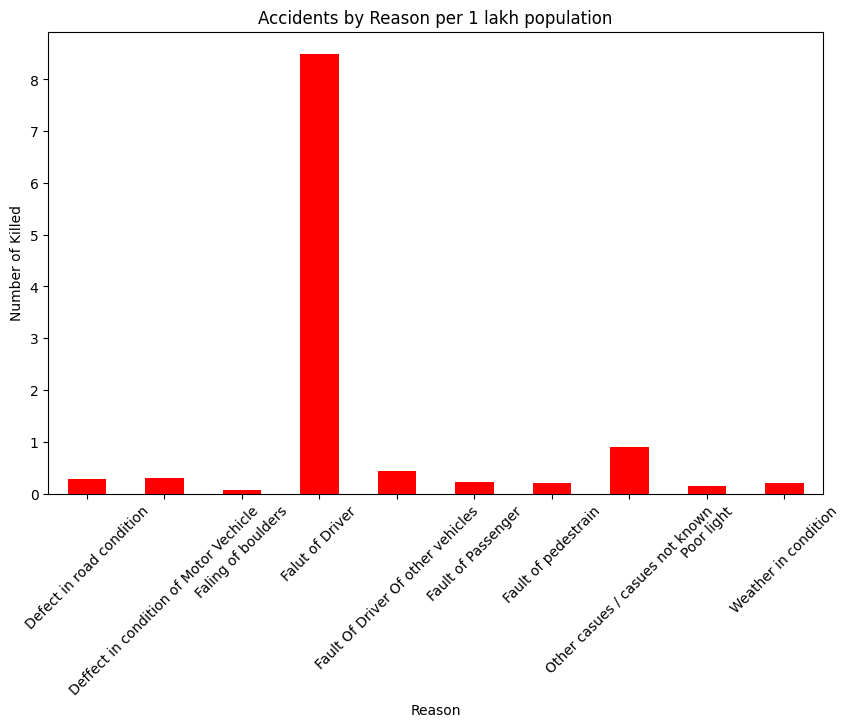

In [192]:
#  Number of people KILLED for each different REASON per 1L population of that state
reason_lakhs_killed = df5.groupby('Reason')['Killed'].sum()
plt.figure(figsize=(10, 6))
reason_lakhs_killed.plot(kind='bar', color='red')
plt.title('Accidents by Reason per 1 lakh population')
plt.ylabel('Number of Killed')
plt.xlabel('Reason')
plt.xticks(rotation=45)
plt.show()


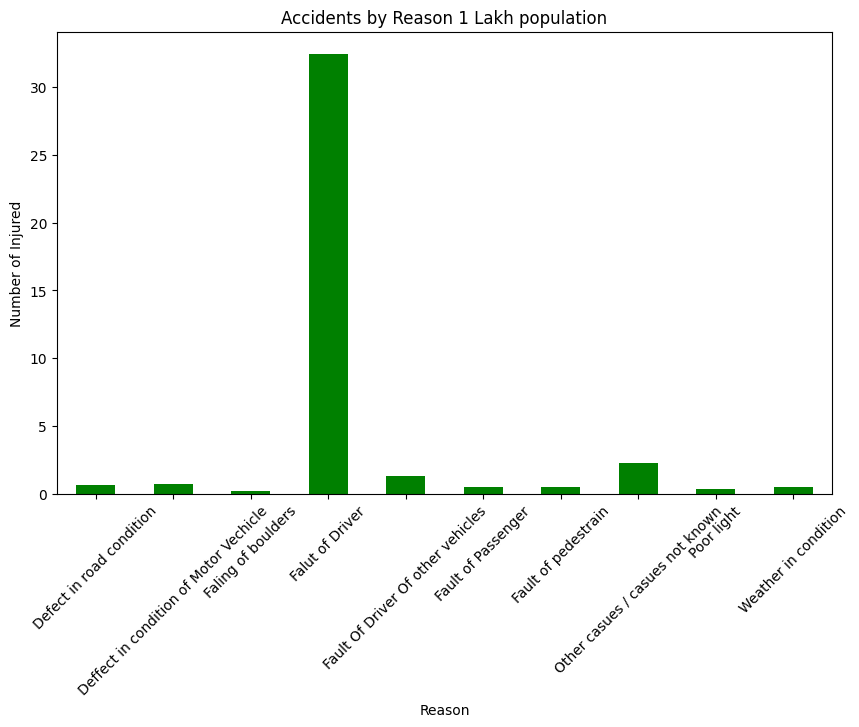

In [193]:
#Number of people INJURED for each reason per 1L people of that state
reason_lakhs_injured = df5.groupby('Reason')['Injured'].sum()
plt.figure(figsize=(10, 6))
reason_lakhs_injured.plot(kind='bar', color='green')
plt.title('Accidents by Reason 1 Lakh population')
plt.ylabel('Number of Injured')
plt.xlabel('Reason')
plt.xticks(rotation=45)
plt.show()

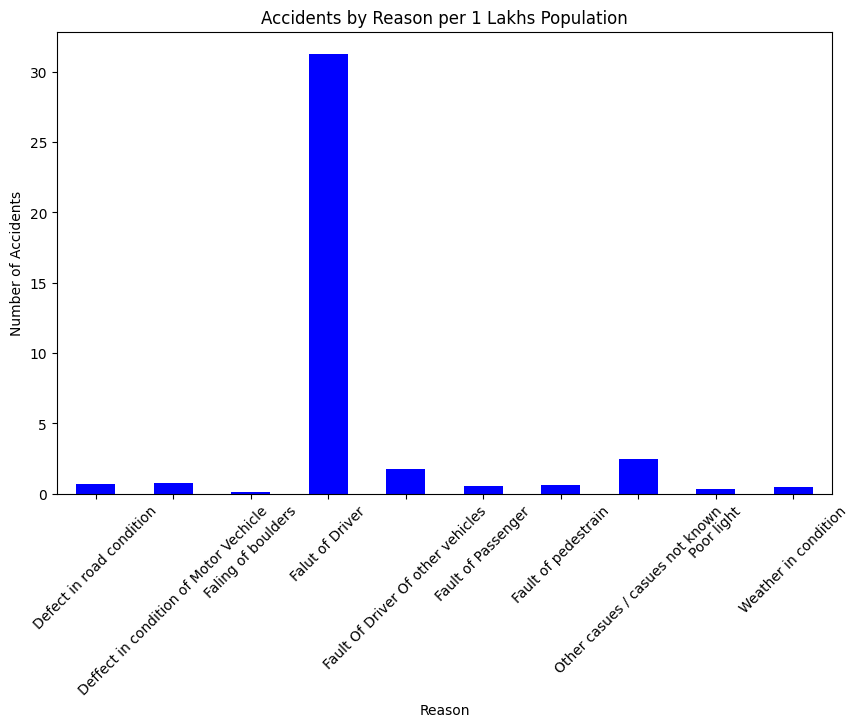

In [194]:
# Number of ACCIDENTS for each reason per 1L people of that state
reason_lakhs_accidents = df5.groupby('Reason')['Accidents'].sum()
plt.figure(figsize=(10, 6))
reason_lakhs_accidents.plot(kind='bar', color='blue')
plt.title('Accidents by Reason per 1 Lakhs Population')
plt.ylabel('Number of Accidents')
plt.xlabel('Reason')
plt.xticks(rotation=45)
plt.show()

In [195]:
# Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF THE DRIVER per 1L population of that state.
driver_fault_lakhs = df5[df5['Reason']=='Falut of Driver']['Total Number Of'].sum().mean();
print(f"Accidents due to driver fault per lakh: {driver_fault_lakhs}")


Accidents due to driver fault per lakh: 8.49631062


In [175]:
# Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT Of DRIVER'S FROM OTHER VEHICLES per 1L people of that state
fault_other_vechicle = df5[df5['Reason']=='Fault Of Driver Of other vechicles']['Fault Of Driver Of other vechicles Total'].sum().mean();
print(f"Accidents due to driver fault per lakh: {fault_other_vechicle}")

KeyError: 'Fault Of Driver Of other vechicles Total'

In [196]:
# Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PEDESTRIANS per 1L people of that state
fault_pedestrain = df5[df5['Reason']=='Fault of pedestrain']['Fault of pedestrain Total'].sum().mean();
print(f"Accidents due to driver fault per lakh: {fault_pedestrain}")


Accidents due to driver fault per lakh: 0.211008


In [112]:
#Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN THE VEHICLE per 1L people of that state.

Deffect_in_condition_of_motor_vechicle = df5[df5['Reason']=='Deffect in condition of Motor Vechicle']['Deffect in condition of Motor Vechicle Total'].sum().mean();
print(f"Accidents due to driver fault per lakh: {Deffect_in_condition_of_motor_vechicle}")

Accidents due to driver fault per lakh: 0.0


In [197]:
# Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to DEFECTS IN THE ROAD CONDITION per 1L people of that state
Defect_in_road_condition = df5[df5['Reason']=='Defect in road condition']['Defect in road condition Total'].sum().mean();
print(f"Accidents due to driver fault per lakh: {Deffect_in_condition_of_motor_vechicle}")

Accidents due to driver fault per lakh: 0.0


In [115]:
# Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to WEATHER CONDITION per 1L people of that state.
Weather_in_condition = df5[df5['Reason']=='Weather in condition']['Weather in condition Total'].sum().mean();
print(f"Accidents due to driver fault per lakh: {Weather_in_condition}")

Accidents due to driver fault per lakh: 0.0


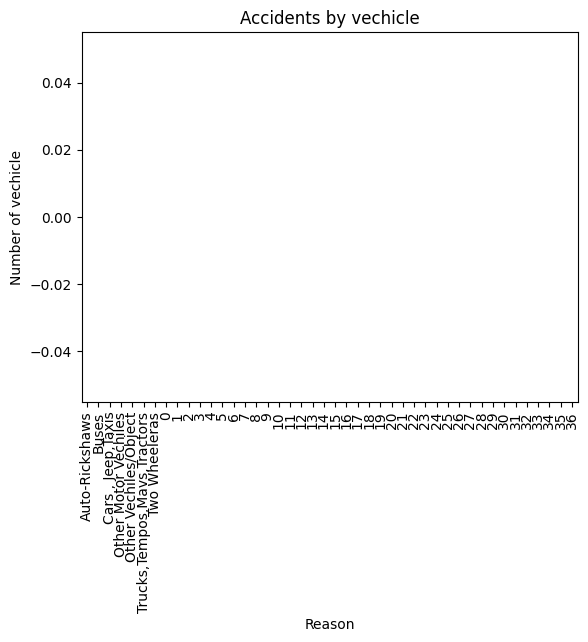

In [116]:
# Number of Total Accidents for each vehicle type per 1L people of that state.
accidents_by_vehicle = df6.groupby('Vechicles')['Accidents'].sum() / df6['Population'] * 100000
accidents_by_vehicle.plot(kind='bar', color='skyblue')
plt.title('Accidents by vechicle')
plt.ylabel('Number of vechicle')
plt.xlabel('Reason')
plt.show()



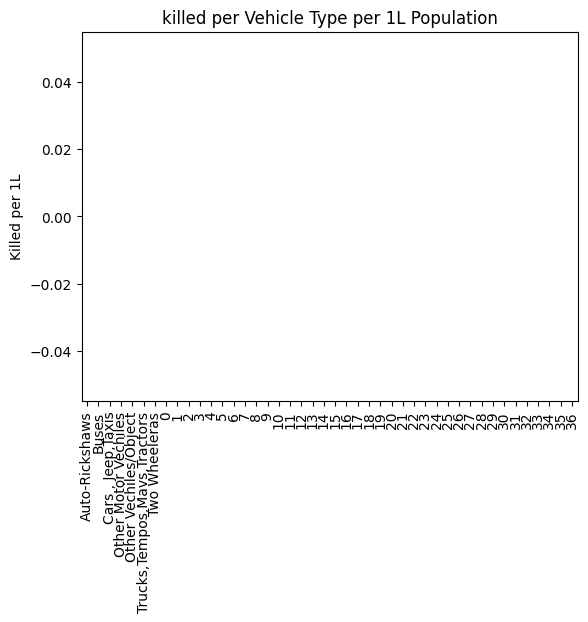

In [198]:
#. Number of Persons Killed for each vehicle type per 1L people of that state.
accidents_by_vehicle_lakhs_killed = df6.groupby('Vechicles')['Killed'].sum() / df6['Population'] * 100;
accidents_by_vehicle_lakhs_killed.plot(kind='bar', color='seagreen')
plt.title('killed per Vehicle Type per 1L Population')
plt.ylabel('Killed per 1L')
plt.show()


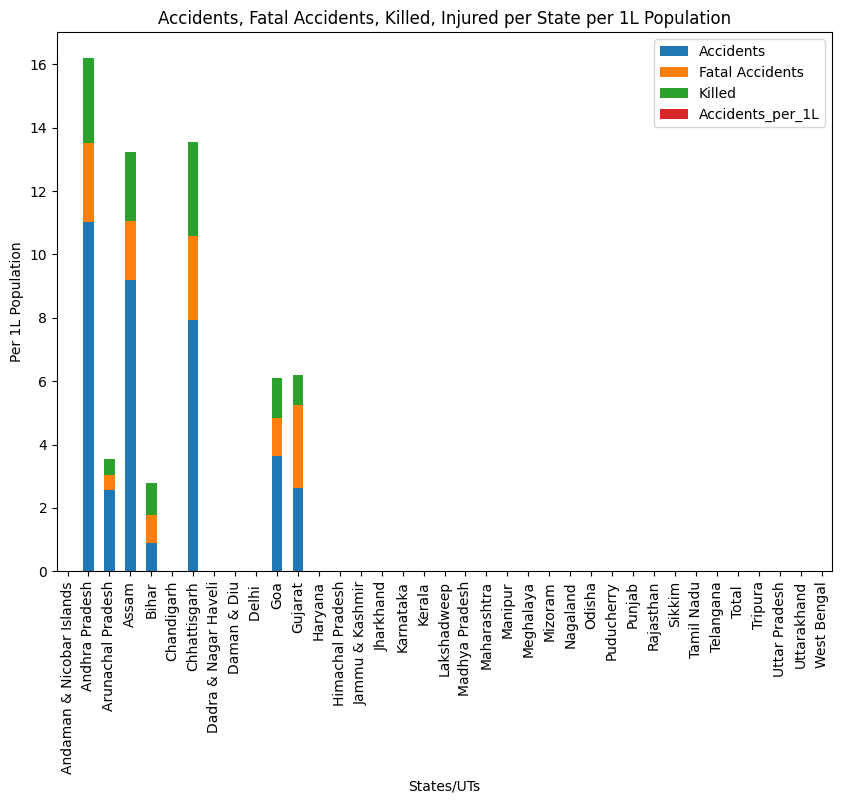

In [118]:
#26 Accidents, fatal accidents, killed, and injured for each state per 1L 
accidents_per_state = df6.groupby('States/UTs').agg({'Accidents': 'sum', 'Fatal Accidents': 'sum', 'Killed': 'sum',})
accidents_per_state['Accidents_per_1L'] = accidents_per_state['Accidents'] / df6['Population'] * 100000
accidents_per_state.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Accidents, Fatal Accidents, Killed, Injured per State per 1L Population')
plt.ylabel('Per 1L Population')
plt.show()


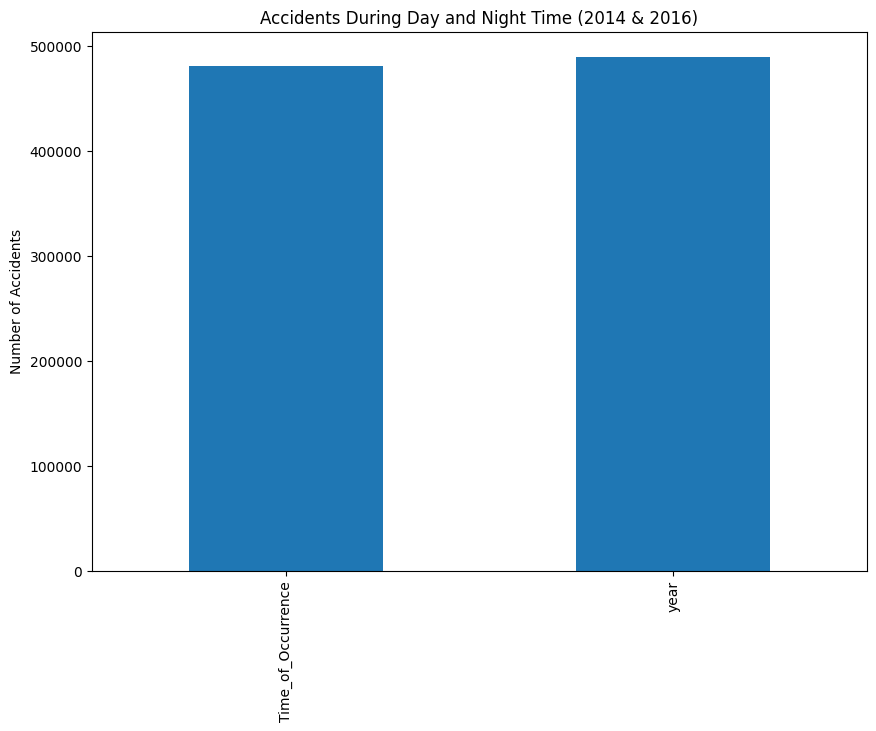

In [122]:
# 27 Number of accidents during day and night time for 2014 and 2016
df7_2014_2016 = df7[df7['year'].isin([2014, 2016])]
accidents_time = df7_2014_2016.groupby(['year', 'Time_of_Occurrence'])['Accidents'].sum()
accidents_time.plot(kind='bar',figsize=(10, 7))
plt.title('Accidents During Day and Night Time (2014 & 2016)')
plt.ylabel('Number of Accidents')
plt.show()
